<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/11_CNN%EC%9D%98_%ED%99%9C%EC%9A%A9(%EC%86%8C%EC%9B%A8%EC%9C%B5_13%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10
* 사물 구분하는 데이터

## 라이브러리 임포트

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

## 데이터 전처리

In [13]:
def load_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [14]:
def show_data_plot(trainX):
  fig,axs = plt.subplots(1,10,figsize=(20,20))
  for i in range(10):
    axs[i].imshow(trainX[i])
    axs[i].axis('off')
  plt.show()

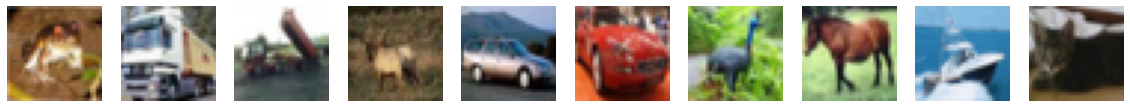

In [15]:
trainX,trainY,testX,testY=load_dataset()
show_data_plot(trainX)

In [16]:
#one-hot enocoding
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [17]:
trainY

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

In [18]:
#표준화
def prep_pixels(train, test):
  train_norm = train / 255.0
  test_norm = test / 255.0
  return train_norm, test_norm

## Basline 설정

In [19]:
#input shape
trainX[0].shape

(32, 32, 3)

In [20]:
def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [21]:
def summarize_plot(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()

In [22]:
# def run_cnn():
#   trainX,trainY,testX,testY = load_dataset()
#   trainX,testX=prep_pixels(trainX,testX)
#   model = define_model()
#   early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True)
#   history = model.fit(trainX,trainY,epochs=20,batch_size=62,validation_data = (testX,testY),verbose=1,callbacks=[early_stopping_cb])
#   _,acc = model.evaluate(testX,testY,verbose=0)
#   print('> %.3f'%(acc*100.0))

def run_cnn():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = define_model()
  early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True)
  history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[early_stopping_cb])
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  summarize_plot(history)

Epoch 1/20
782/782 [==============================] - 15s 5ms/step - loss: 1.6048 - accuracy: 0.4291 - val_loss: 1.7577 - val_accuracy: 0.3798
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2938 - accuracy: 0.5450 - val_loss: 1.2904 - val_accuracy: 0.5448
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1788 - accuracy: 0.5882 - val_loss: 1.2322 - val_accuracy: 0.5580
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0914 - accuracy: 0.6208 - val_loss: 1.2973 - val_accuracy: 0.5608
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.0245 - accuracy: 0.6443 - val_loss: 1.3595 - val_accuracy: 0.5419
> 55.800


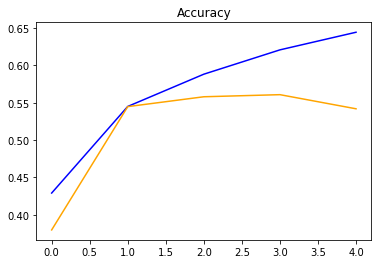

In [23]:
run_cnn()

## 모델 개선

In [29]:
#input shape
trainX[0].shape

(32, 32, 3)

In [42]:
def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [43]:
def summarize_plot(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()

In [44]:
def run_cnn():
  trainX,trainY,testX,testY = load_dataset()
  trainX,testX=prep_pixels(trainX,testX)
  model = define_model()
  early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True)
  history = model.fit(trainX,trainY,epochs=20,batch_size=62,validation_data = (testX,testY),verbose=1,callbacks=[early_stopping_cb])
  _,acc = model.evaluate(testX,testY,verbose=0)
  print('> %.3f'%(acc*100.0))

def run_cnn():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = define_model()
  early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True)
  history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[early_stopping_cb])
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  summarize_plot(history)

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.6958 - accuracy: 0.3835 - val_loss: 1.5473 - val_accuracy: 0.4683
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.1476 - accuracy: 0.5945 - val_loss: 1.1919 - val_accuracy: 0.5664
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.8877 - accuracy: 0.6897 - val_loss: 1.1452 - val_accuracy: 0.6070
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.7332 - accuracy: 0.7461 - val_loss: 0.9075 - val_accuracy: 0.7110
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.6264 - accuracy: 0.7853 - val_loss: 1.0297 - val_accuracy: 0.6997
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 0.5447 - accuracy: 0.8134 - val_loss: 1.0371 - val_accuracy: 0.7240
> 71.100


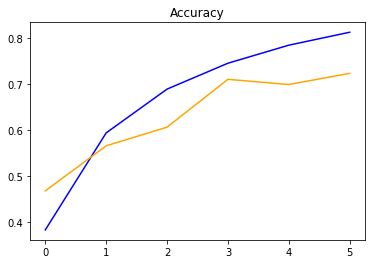

In [45]:
run_cnn()